In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('Data\AMZN.csv')

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-15,89.750000,89.752502,86.711502,88.047501,88.047501,128744000
1,2018-10-16,89.175003,91.194000,88.077499,90.998001,90.998001,117198000
2,2018-10-17,92.139503,92.250000,90.349998,91.586502,91.586502,105904000
3,2018-10-18,91.074501,91.507500,88.393501,88.536003,88.536003,117480000
4,2018-10-19,89.258003,90.455002,87.650002,88.201500,88.201500,118144000
...,...,...,...,...,...,...,...
1253,2023-10-09,126.220001,128.789993,124.760002,128.259995,128.259995,38773700
1254,2023-10-10,128.820007,130.740005,128.050003,129.479996,129.479996,42178600
1255,2023-10-11,129.740005,132.050003,129.610001,131.830002,131.830002,40741800
1256,2023-10-12,132.169998,134.479996,131.229996,132.330002,132.330002,55528600


In [6]:
df = df[['Date', 'Close']]

In [7]:
df['Date']

0       2018-10-15
1       2018-10-16
2       2018-10-17
3       2018-10-18
4       2018-10-19
           ...    
1253    2023-10-09
1254    2023-10-10
1255    2023-10-11
1256    2023-10-12
1257    2023-10-13
Name: Date, Length: 1258, dtype: object

In [8]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1968-4-5')
datetime_object

datetime.datetime(1968, 4, 5, 0, 0)

In [9]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\Naziya Mahimkar\AppData\Local\Temp\ipykernel_4540\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2018-10-15
1      2018-10-16
2      2018-10-17
3      2018-10-18
4      2018-10-19
          ...    
1253   2023-10-09
1254   2023-10-10
1255   2023-10-11
1256   2023-10-12
1257   2023-10-13
Name: Date, Length: 1258, dtype: datetime64[ns]

In [10]:
df.index = df.pop('Date')
df

,Close
Date,
2018-10-15,88.047501
2018-10-16,90.998001
2018-10-17,91.586502
2018-10-18,88.536003
2018-10-19,88.201500
...,...
2023-10-09,128.259995
2023-10-10,129.479996
2023-10-11,131.830002


<function matplotlib.pyplot.show(close=None, block=None)>

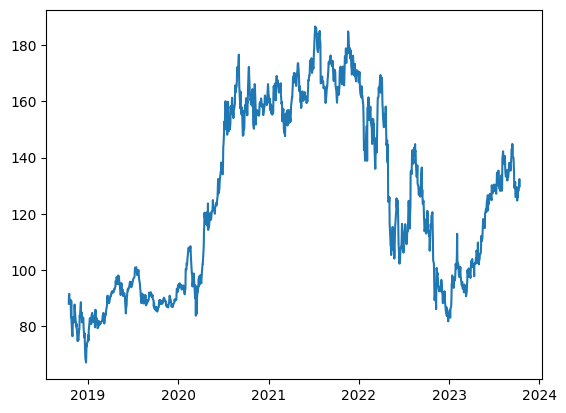

In [11]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

plt.show

In [12]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2018-10-18', 
                                '2023-10-13', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2018-10-18,88.047501,90.998001,91.586502,88.536003
1,2018-10-19,90.998001,91.586502,88.536003,88.201500
2,2018-10-22,91.586502,88.536003,88.201500,89.464996
3,2018-10-23,88.536003,88.201500,89.464996,88.434998
4,2018-10-24,88.201500,89.464996,88.434998,83.209999
...,...,...,...,...,...
1250,2023-10-09,127.000000,125.959999,127.959999,128.259995
1251,2023-10-10,125.959999,127.959999,128.259995,129.479996
1252,2023-10-11,127.959999,128.259995,129.479996,131.830002
1253,2023-10-12,128.259995,129.479996,131.830002,132.330002


In [13]:
windowed_df.to_csv('windowed_df.csv')

In [14]:
# Creating a numpy array to feed it directly to the network
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_numpy = windowed_dataframe.to_numpy()

  dates = df_as_numpy[:, 0]

  middle_matrix = df_as_numpy[:,1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1],1))

  Y = df_as_numpy[:,-1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1255,), (1255, 3, 1), (1255,))

<function matplotlib.pyplot.show(close=None, block=None)>

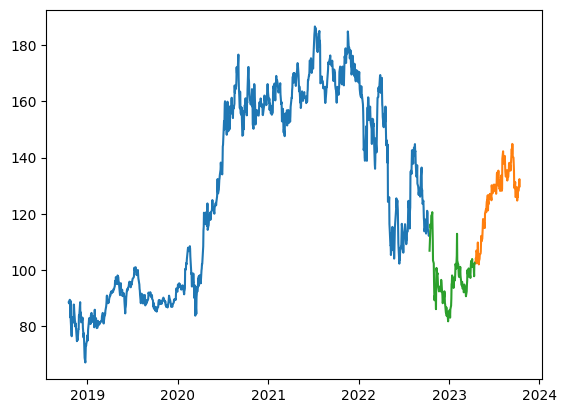

In [15]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_test, X_test, y_test = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_val, X_val, y_val = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.show

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3,1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

c:\Users\Naziya Mahimkar\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


Epoch 1/100
32/32 [==============================] - 2s 15ms/step - loss: 17301.2168 - mean_absolute_error: 126.9853 - val_loss: 14982.5811 - val_mean_absolute_error: 121.9021
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 15260.2578 - mean_absolute_error: 118.5475 - val_loss: 11209.0293 - val_mean_absolute_error: 105.2771
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 8759.7344 - mean_absolute_error: 85.3609 - val_loss: 2572.6252 - val_mean_absolute_error: 49.4780
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 1798.6984 - mean_absolute_error: 35.4923 - val_loss: 182.9403 - val_mean_absolute_error: 9.8492
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1162.9412 - mean_absolute_error: 31.4438 - val_loss: 111.2181 - val_mean_absolute_error: 7.9320
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 894.5330 - mean_absolute_error: 27.3093 - val_loss: 36.0774 - val_m

4/4 [==============================] - 0s 1ms/step


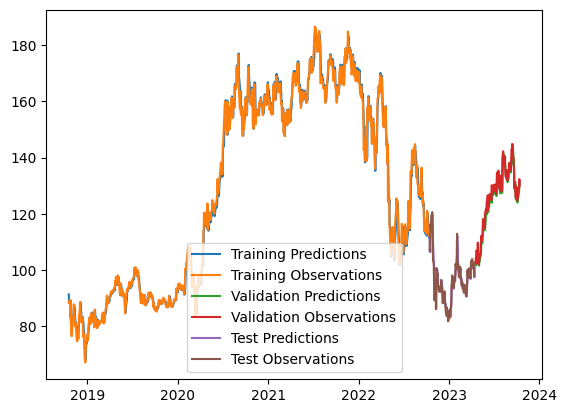

In [17]:
train_prediction = model.predict(X_train).flatten()
test_prediction = model.predict(X_test).flatten()
val_prediction = model.predict(X_val).flatten()

plt.plot(dates_train, train_prediction)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_prediction)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_prediction)
plt.plot(dates_test, y_test)


plt.legend(['Training Predictions', 'Training Observations',
            'Validation Predictions', 'Validation Observations',
            'Test Predictions', 'Test Observations'])

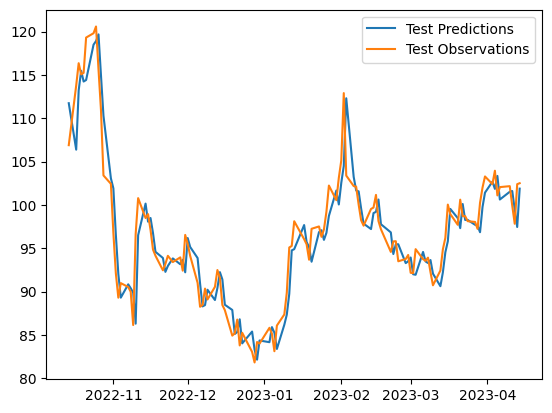

In [18]:
plt.plot(dates_test, test_prediction)
plt.plot(dates_test, y_test)

plt.legend(['Test Predictions', 'Test Observations'])

In [19]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, test_prediction)
mse = metrics.mean_squared_error(y_test, test_prediction)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test, test_prediction)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 2.0222764
MSE: 7.4217963
RMSE: 2.7242973
R-Squared: 0.8821232623077709


In [20]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_train, train_prediction)
mse = metrics.mean_squared_error(y_train, train_prediction)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_train, train_prediction)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 2.0866091
MSE: 8.734225
RMSE: 2.9553723
R-Squared: 0.9925452125563213
